# SCRIPT Y DOCUMENTACIÓN FAMILIA DE PROTEÍNAS ARF
Ciencia de datos para ciencias de la vida

2024-2



**Elaborado por: David Alejandro Gómez & Mariana López**

dagomez1@eafit.edu.co - mlopezg11@eafit.edu.co

# 1. Construcción de Filogenia por el número de proteínas homólogas


Se genera el documento slurm en apolo.

In [ ]:
#!/bin/bash

#SBATCH --partition=learning                    # Partition
#SBATCH --nodes=1
#SBATCH --ntasks=1                              # Number of tasks (processes)
#SBATCH --time=0-1:00:00                        # Walltime
#SBATCH --job-name=blastp_ARFplants             # Job name
#SBATCH --output=%x_%j.out                      # Stdout (%x-jobName, %j-jobId)
#SBATCH --error=%x_%j.err                       # Stderr (%x-jobName, %j-jobId)
#SBATCH --mail-type=ALL                         # Mail notification
#SBATCH --mail-user=dagomez1@eafit.edu.co       # User Email


##### ENVIRONMENT CREATION #####
module load python/3.10_miniconda-23.5.2

#### JOB COMANDS ####

Se activa el ambiente con los programas instalados

In [ ]:
%% bash

source activate clase


Se crean las bases de datos

In [ ]:
makeblastdb -in /home/dagomezs1/data/Proteomes/Athaliana_167_protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Atrichopoda_291_v1.0.protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Crichardii_676_v2.1.protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Mpolymorpha_320_v3.1.protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Osativa_204_protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Pvulgaris_442_v2.1.protein.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Tplicata_572_v3.1.protein_primaryTranscriptOnly.fa -parse_seqids -dbtype prot
makeblastdb -in /home/dagomezs1/data/Proteomes/Zmays_493_RefGen_V4.protein.fa -parse_seqids -dbtype prot


Se realiza el blast

In [ ]:
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Athaliana_167_protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/athARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Atrichopoda_291_v1.0.protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/atrARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Crichardii_676_v2.1.protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/crARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Mpolymorpha_320_v3.1.protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/mpARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Osativa_204_protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/osARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Pvulgaris_442_v2.1.protein.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/pvARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Tplicata_572_v3.1.protein_primaryTranscriptOnly.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/tpARF.blastp
blastp -query /home/dagomezs1/analisis/atARF.fasta -db /home/dagomezs1/data/Proteomes/Zmays_493_RefGen_V4.protein.fa -outfmt 6 -evalue 1e-4 -out /home/dagomezs1/analisis/zmARF.blastp

Se filtra por porcentaje de identidad y se organiza por e value

In [ ]:
sort -k2,1 -k11g /home/dagomezs1/analisis/athARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/athARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/atrARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/atrARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/crARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/crARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/mpARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/mpARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/osARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/osARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/pvARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/pvARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/tpARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/tpARF.blastp.sort
sort -k2,1 -k11g /home/dagomezs1/analisis/zmARF.blastp  | awk '!a[$2]++' > /home/dagomezs1/analisis/resultados_blast_sort/zmARF.blastp.sort

Luego del filtrado por identidad y estado de los dominios ARF y B3, se obtuvieron los siguientes números de proteínas ARF homólogas por taxón (identidad > 40).

Posteriormente se utilizó la web "Batch CD search tool" para identificar las secuencias que tuvieran los dominios de interés (B3 y Auxin response) incompletos para descartarlas y construir el árbol con el nuevo número de secuencias.

En total se eliminaron:
-2 secuencias de *Marchantia polymorpha*
-12 secuencias de *Oryza sativa*
-24 secuencias de *Zea mays*

Dando como resultado la **Fig. 1**

###Fig 1. Número de proteínas ARF homólogas por taxón (identidad > 40).

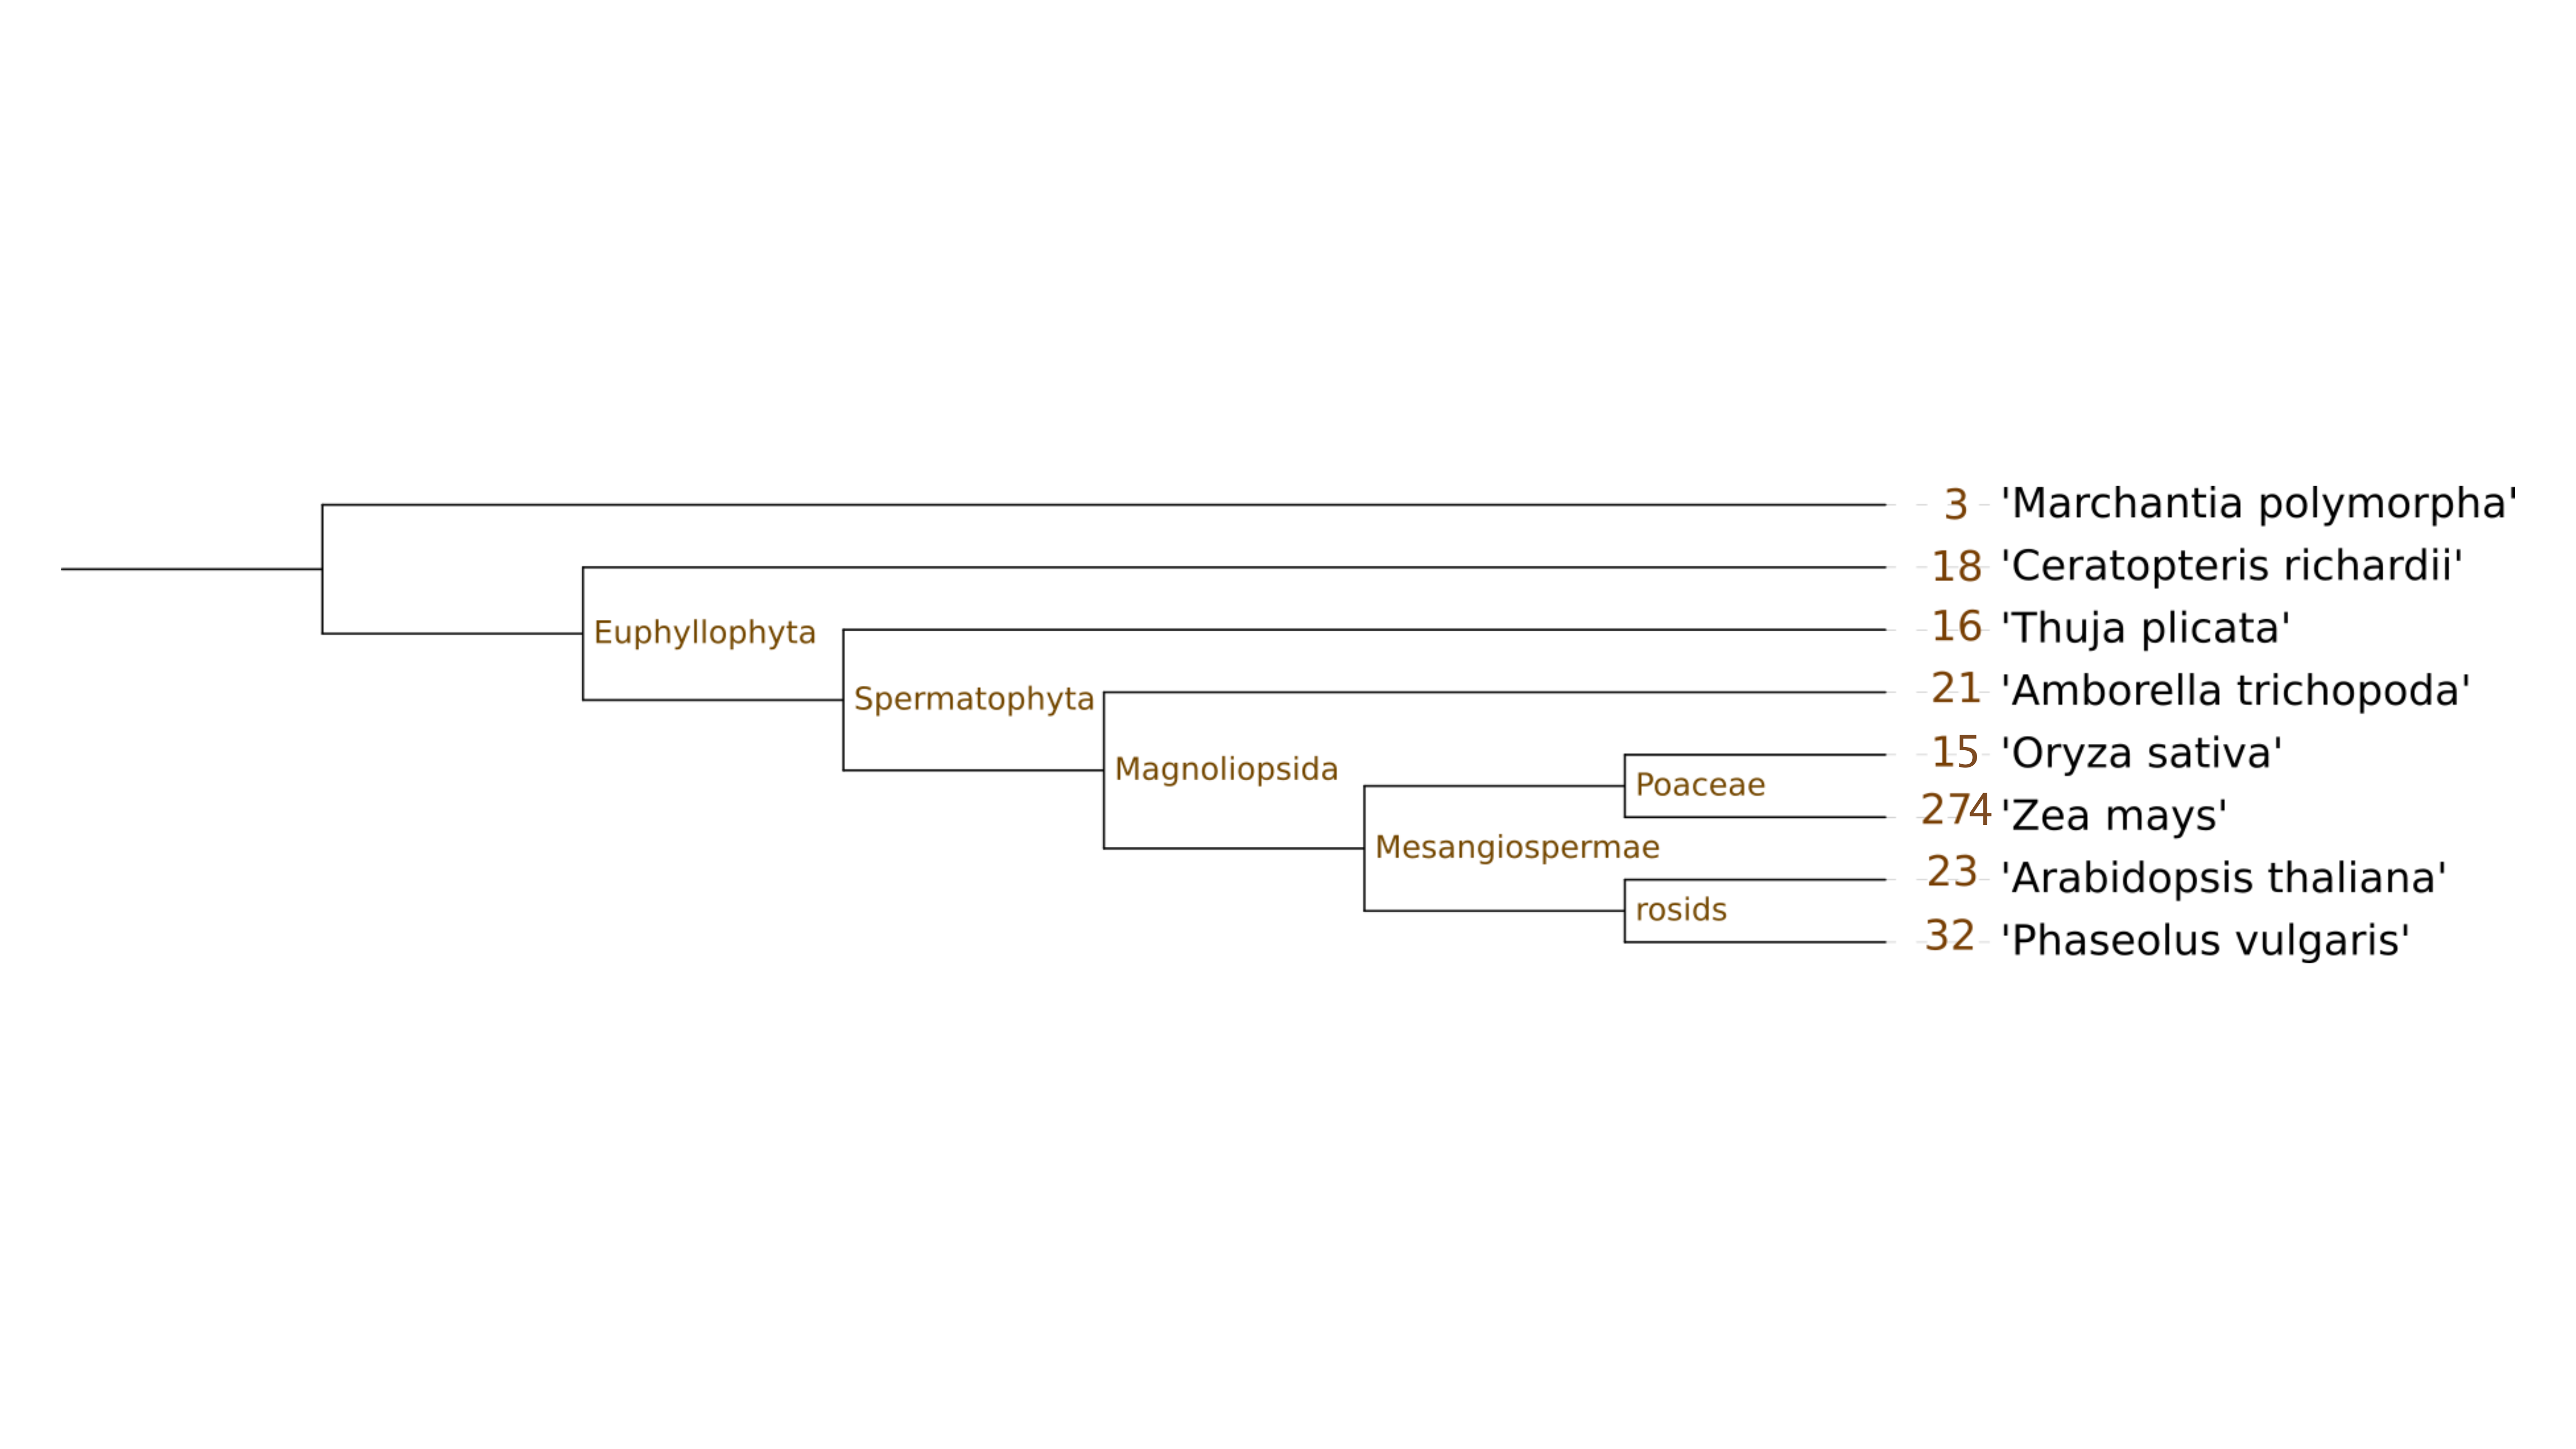

# 2. Construcción de la filogenia con la totalidad de genes ARF

Por medio de código podemos obtener los IDs (luego de filtrarlos por identidad) por medio de:





In [ ]:
awk ‘(print (mostrar en pantalla) $2) [Archivo a sortear] > [Archivo novo]

1. Como ya lo filtramos por medio de excel, debemos generar un archivo .txt para cada especie con los IDs tomados del excel.

2. Obtener los links de acceso a los proteomas.
Por ejemplo: /shared-dirs/bec-cibiop/download_plants/Phytozome/PhytozomeV12/Atrichopoda/annotation/Atrichopoda_291_v1.0.protein_primaryTranscriptOnly.fa

3. Activar el ambiente de conda y usar seqtk

In [ ]:
conda activate Blast_CDatos

4. Dicho archivo .txt lo llevamos con el proteoma para usar seqtk para extraer las secuencias para de aminoácidos y generar un nuevo archivo, para luego cuantificar el total de genes.

In [ ]:
seqtk subseq Athaliana_167_protein_primaryTranscriptOnly.fa IDs.txt > atARF.fasta
grep -c ">" atARF.fasta

5. Estos archivos .fasta luego son llevados a la página de la NCBI para revisar que contengan los dominios completos.

https://www.ncbi.nlm.nih.gov/Structure/bwrpsb/bwrpsb.cgi

En este caso se seleccionaron los dominios ARF (auxin response) y B3 para la selección de los .fasta (segundo filtro).

N: incompleto en el N terminal.
C: incompleto en el C terminal.
NC: incompleto en ambos terminales.

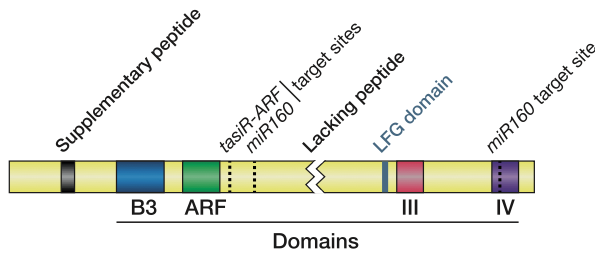

Para los filtrados se descargan los archivos Domain Hits - Concise. se abren en excel y se filtran rescatando los dominios completos con los IDs. para luego repetir el seqtk con este nuevo filtrado.

Se obtuvieron los filtrados y de ahí se generaron nuevamente los .fasta de cada una de las especies.
Posteriormente, se generará un multifasta donde tengamos los fastas de todas las especies dentro de un mismo archivo para el alineamiento.
Para esto vamos a concatenar todos los archivos.


In [ ]:
cat *.fa > ARFmultifasta.fa
grep -c ">" ARFmultifasta.fa

Crear un nuevo ambiente de conda para el alineamiento-filogenia e instalar los siguientes programas dentro del ambiente.

mafft: alineador múltiple. Hacen todo el factorial, todas contra todas y se hace un consenso. Tiene una gran cantidad de opciones para determinar el alineamiento.

auto: mejor manera del alineamiento
reorder: Outorder: aligned, default: input order
clustalout :   Output: clustal format, default: fasta
thread # :     Number of threads (if unsure, --thread -1)
maxiterate # : Maximum number of iterative refinement, default: 0

iqtree: filogenia.


In [ ]:
conda create —name phylo
conda activate phylo
conda install  -c bioconda iqtree
conda install -c bioconda mafft

Para poder hacer uso de ambos programas se debe instalar un slurm en apolo y generamos la función basándose en esta base.

Corremos el archivo y verificamos si se encuentra corriendo.

In [ ]:
mafft --auto --reorder --clustalout --maxiterate 1000 /home/mlopezg11/analisis_plants/Proteomes_sort/ARFmultifasta.fa > /home/mlopezg11/analisis_plants/Proteomes_sort/ARF_Mafft.clustal

sbatch mafftARF.sh
squeue

mafft Strategy:

**FFT-NS-i (Standard)**

Al ver que los alineamientos tienen bastante ruido y espacios, lo ideal es realizar un trimmado.

In [ ]:
conda install trimal

Luego corremos el iqTree
El Slurm empleado fue el siguiente:


Posteriormente modificamos el ARFmultifasta_v3.fa
con BBedit los nombres de los ID para que sean empleados por iqTree.

Para ello se transfirió el documento a mi propio PC para hacer las modificaciones.
scp mlopezg11@apolo.eafit.edu.co:/home/mlopezg11/analisis_plants/Proteomes_sort/phylo/ARFmultifasta_v3.fa .

Los nombres fueron modificados con la función Buscar y reemplazar todos en BBEdit, basándonos en las siguientes condiciones.
evm_27.model.AmTr_v1.0_scaffold → AmTr
Ceric. → CR
Mapoly → MP
Phvul. → PV
Thupl.293 → TP
Zm00001 → ZM

Luego devolvemos este archivo a Apolo.
scp ARFmultifasta_v4.fa mlopezg11@apolo.eafit.edu.co: /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/

Corremos nuevamente el Slurm para generar el nuevo Mafft
sbatch mafftARF_v3.sh
squee
Esto nos dará como resultado un archivo
ARF_Mafft_v4.clustal

Lo movemos a la carpeta que deseamos
mv ARF_Mafft_v4.clustal phylo/iqTree/

Generamos nuevamente el Slurm para correr el iqTree y corremos el Slurm
sbatch ARF_iqTree_v3.sh
squeue

In [ ]:
module load python/3.10_miniconda-23.5.2
source activate phylo

iqtree2 -s /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/ARF_Mafft.clustal --alrt 1000 -B 1000

Vemos que dentro del proceso hubo fallos, por lo que se planteó el siguiente flujo de trabajo.

1. Se eliminaron los | del multifasta para poder correr el iqTree


2. También eliminamos los * para que pueda correr en iqTree

3. Posteriormente modificamos el ARFmultifasta_v3.fa
con BBedit los nombres de los ID para que sean empleados por iqTree.

Para ello se transfirió el documento a mi propio PC para hacer las modificaciones.

Los nombres fueron modificados con la función Buscar y reemplazar todos en BBEdit, basándonos en las siguientes condiciones.
evm_27.model.AmTr_v1.0_scaffold → AmTr
Ceric. → CR
Mapoly → MP
Phvul. → PV
Thupl.293 → TP
Zm00001 → ZM

4. Luego devolvemos este archivo a Apolo.

5. Corremos nuevamente el Slurm para generar el nuevo Mafft.

Esto nos dará como resultado un archivo
ARF_Mafft_v4.clustal



In [ ]:
#1
/home/mlopezg11/analisis_plants/Proteomes_sort/phylo/
sed -s 's/|/ /g' ARF > multifasta_withoutpipe.fa

#2
sed -s 's/*//g' ARFmultifasta_v2.fa > ARFmultifasta_v3.fa

#3
scp mlopezg11@apolo.eafit.edu.co:/home/mlopezg11/analisis_plants/Proteomes_sort/phylo/ARFmultifasta_v3.fa .

#4
scp ARFmultifasta_v4.fa mlopezg11@apolo.eafit.edu.co: /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/

#5
sbatch mafftARF_v3.sh
squee


In [ ]:
## Slurm mafft
#!/bin/bash
## Documentación

##### ENVIRONMENT CREATION #####
module load python/3.10_miniconda-23.5.2

##### JOB COMMANDS #####
source activate phylo
mafft --auto --reorder --clustalout --maxiterate 1000 /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/ARFmultifasta_v4.fa > /home/mlopezg11/analisis_plants/Proteomes_sort/ARF_Mafft_v4.clustal

## Slurm iqTree
#!/bin/bash
## Documentación

##### ENVIRONMENT CREATION #####
module load python/3.10_miniconda-23.5.2
source activate phylo

##### JOB COMMANDS #####
cd /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/iqTree
iqtree2 -s /home/mlopezg11/analisis_plants/Proteomes_sort/phylo/ARF_Mafft.clustal --alrt 1000 -B 1000


Continuación, vimos que el iqTree tarda mucho tiempo en generarse principalmente porque el alineamiento es muy pobre. Es por esto que se consideró hacer uso de trimal.

  -automated1: Use a heuristic selection of the automatic method based on similarity statistics. (see User Guide). (Optimized for Maximum Likelihood phylogenetic tree reconstruction).


In [ ]:
conda activate phylo
conda install bioconda::trimal

trimal -in [archivo.clustal; ARF_Mafft_v4.clustal] -out ARF_Mafft_trimal.clustal -automated1

Corremos nuevamente el ARF_iqTree_v3.sh, pero antes debemos modificar el nombre del archivo.
vim ARF_iqTree_v3.sh

ARF_Mafft.clustal → ARF_Mafft_trimal.clustal

sbatch ARF_iqTree_v3.sh
squeue


1. Se ensayaron nuevos parámetros en Trimmal.

2. Corremos nuevamente el ARF_iqTree_v3.sh, pero antes debemos modificar el nombre del archivo.

ARF_Mafft_trimal.clustal
 → ARF_Mafft_trimal_v2.clustal

Esto nos debe dar como resultado diversos archivos, pero el de nuestro interés será el .contree
Apartir de ello vamos a generar las filogenias.
Requerimos de 4 archivos de iqTree.

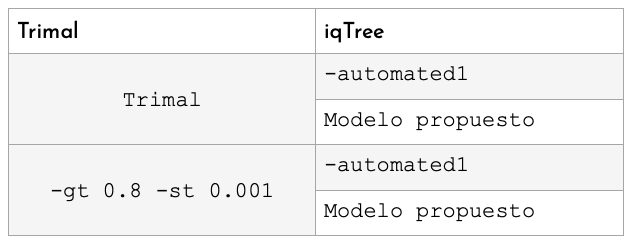

In [ ]:
iqtree2 -s [Archivo.clustal] --alrt 1000 -B 1000 -m Q.plant+R4


Al obtener las primeras filogenias en el modelo automático, se observan los siguientes modelos como candidatos para la segunda etapa de las filogenias.

JTT+F+R6 (trimmal) = más óptimo
Q.insect+G4 (-gt) = 36872.39
Q.plant+R4 = 36890.436
Q.insect+R4 = 36872.391
Dentro de la literatura se ha observado que estos emplean:
LG+Γ (sin embargo, este parece como un modelo simple que se puede acoplar a cualquier sistema).

Teniendo en cuenta los resultados, se correarán nuevamente el iqTree con el modelo Q.plant+R4 para ambos procesos de corte.


Luego de tener los arboles .contree con el modelo propuesto (Q.plant+R4), estos se suben a iTOL y se comparan con la literatura. Para ello empleamos el artículo:

https://doi.org/10.1016/j.ijbiomac.2023.126833

https://doi.org/10.1093/molbev/mss220

Dentro del artículo se presenta el siguiente árbol, la idea es con los resultados comparar la arquitectura y si encontramos similitudes.
Para poder comparar los códigos que tenemos en iTOL con los presentados en el paper, se empleó la plataforma:
https://www.arabidopsis.org/
Dentro del iTOL también es importante considerar los valores de Boostrap.

Como resultado final se consideraron ambos papers:
Evolution of the ARF Gene Family in Land Plants: Old Domains, New Tricks (Finet, et al., 2012).
Genome-wide survey, molecular evolution and expression analysis of Auxin Response Factor (ARF) gene family indicating their key role in seed number per pod in pigeonpea (C. cajan L. Millsp.) (Arpita, et al., 2023).

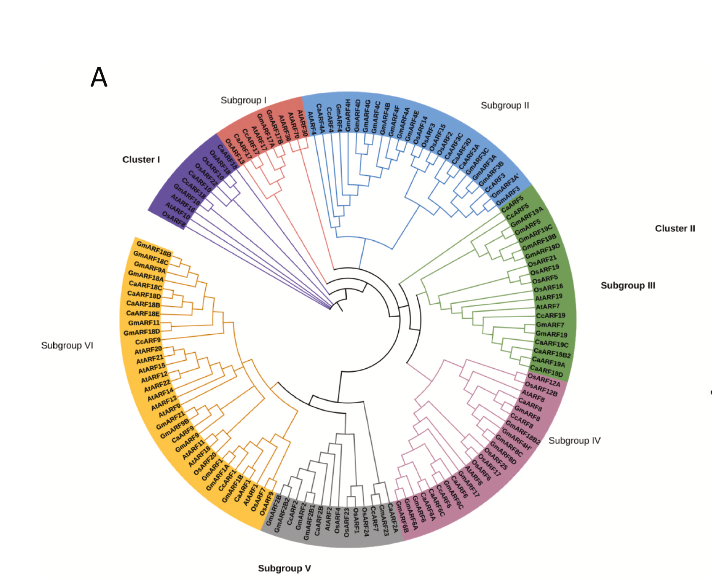

Y se obtuvieron lasiguiente figuras.


## Figura 2. Árbol Filogenético de genes ARF
ARF_QPlant_gt_Gomez&Lopez.svg